### Checklist for submission

It is extremely important to make sure that:

1. Everything runs as expected (no bugs when running cells);
2. The output from each cell corresponds to its code (don't change any cell's contents without rerunning it afterwards);
3. All outputs are present (don't delete any of the outputs);
4. Fill in all the places that say `YOUR CODE HERE`, or "**Your answer:** (fill in here)".
5. You **ONLY** change the parts of the code we asked you to, nowhere else (change only the coding parts saying `# YOUR CODE HERE`, nothing else);
6. Don't add any new cells to this notebook;
7. Fill in your group number and the full names of the members in the cell below;
8. Make sure that you are not running an old version of IPython (we provide you with a cell that checks this, make sure you can run it without errors).

Failing to meet any of these requirements might lead to either a subtraction of POEs (at best) or a request for resubmission (at worst).

We advise you the following steps before submission for ensuring that requirements 1, 2, and 3 are always met: **Restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All). This might require a bit of time, so plan ahead for this (and possibly use Google Cloud's GPU in HA1 and HA2 for this step). Finally press the "Save and Checkout" button before handing in, to make sure that all your changes are saved to this .ipynb file.

---

Group number and member names:

In [1]:
GROUP = "50"
NAME1 = "Adam Tonderski"
NAME2 = "Joakim Berntsson"

Make sure you can run the following cell without errors.

In [2]:
import IPython
assert IPython.version_info[0] >= 3, "Your version of IPython is too old, please update it."

---

# HA1 - Cats and dogs

<img src="http://lghttp.32478.nexcesscdn.net/80E972/organiclifestylemagazine/wp-content/uploads/2015/10/Cats-and-Dogs.jpg" alt="Cats and dogs" style="width: 5000px;"/>

For this home assignment, we'll use the Kaggle dataset for the [Dogs vs. Cats competition](https://www.kaggle.com/c/dogs-vs-cats). It is comprised of 25k colored images of dogs and cats. Our goal with this dataset will be to create a classifier that can tell us if the input image is of a cat or a dog.

As a way of helping you speed up the training process, each group gets 6 hours of access to an instance in Google Cloud with a K80 GPU. Take a look at the [Instructions folder](https://github.com/JulianoLagana/deep-machine-learning/tree/master/Instructions) to understand how to connect to this instance and use our tools there. You're free to use this resource as you see fit, but if you run out of hours you'll need a late day to obtain more (and you can only do this once).

In order to make the most out of your GPU hours, first try solving the initial part of this notebook (tasks 0-4) in your own computer (these tasks can be solved only on the CPU), and leave most of the available hours for solving tasks 5-6, and refining your best model further (and, if you have the spare hours, experiment a bit!).

Requirements:
- Whenever we ask you to plot anything, be sure to add a title and label the axes. If you're plotting more than one curve in the same plot, also add a legend.
- When we ask you to train an architecture, train it for a reasonable number of epochs. "Reasonable" here means you should be fairly confident that training for a higher number of epochs wouldn't impact your conclusions regarding the model's performance.

Tips:
- If you get errors saying you've exhausted the GPU resources, well, then you exhausted the GPU resources ;). However, sometimes that's because TensorFlow didn't release a part of the GPU's memory. If you think your CNN should fit in your memory during training, try restarting the kernel and directly training only that architecture.
- Every group has enough credits on google cloud to complete this assignment. However, this statement assumes you'll use your resources judiciously (e.g. always try the code first in your machine and make sure everything works properly before starting your instances) and **won't forget to stop your instance after using it,**  otherwise you might run out of credits.
- Before starting, take a look at the images we'll be using. This is a hard task, don't get discouraged if your first models perform poorly (several participants in the original competition didn't achieve an accuracy higher than 60%).

---
## 0. Imports

In the following cell, add all the imports you'll use in this assignment.

In [1]:
# Packages for defining the architecture of our model
import keras
from keras.models import Sequential, Model, load_model
from keras.layers import Dense, Flatten, BatchNormalization, Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras import regularizers
from keras.optimizers import Adam

# One-hot encoding
from keras.utils import np_utils

# Callbacks for training
from keras.callbacks import TensorBoard, EarlyStopping

# Ploting
import matplotlib.pyplot as plt
%matplotlib inline

# Fixing GPU issues
import tensorflow as tf
from keras.backend.tensorflow_backend import set_session
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
set_session(tf.Session(config=config))

# Ndarray computations
import numpy as np

# Confusion matrix for assessment step
from sklearn.metrics import confusion_matrix

# pickle to save history
import pickle

Using TensorFlow backend.


---
## 1. Loading the data and preprocessing

The first step is to head to the [Kaggle website for the cats and dogs competition](https://www.kaggle.com/c/dogs-vs-cats) and download the data from there. You should download both the test and train folders together in one zip file (by clicking the download all button). The split ratio between training and validation has not been made, you'll need to do it yourself. The `test.zip` file contains unlabeled data, so that participants in the contest are not able to train on this set.

For this assignment you should use [data generators](https://keras.io/preprocessing/image/) to load the images to your CPU/GPU memory. Because of this, your folder structure for the data should conform to the folder structure expected by the data generators (i.e. the samples should be separated into one folder for each class). Furthermore, we ask you to first start with a smaller subset of the data (1/5 of the number of samples), in order to test different models faster.

This means that you should create a folder structure that resembles the following (obviously, the folder names are up to you):


         small_train             small_val                train                   val
              |                      |                      |                      |
              |                      |                      |                      |
        -------------          -------------          -------------          -------------
        |           |          |           |          |           |          |           |
        |           |          |           |          |           |          |           |
      Cats        Dogs       Cats        Dogs       Cats        Dogs       Cats        Dogs

The `small_train` and `small_val` folders have the training and validation samples for your smaller subset of the data, while the `train` and `val` folders contain all the samples you extracted from Kaggle's `train.zip`. We provide you a notebook that shows how to achieve this ("Create project structure.ipynb"), starting from the original `all.zip` file that you download from Kaggle. If you do use that notebook, we encourage you to understand how each step is being done, so you can generalize this knowledge to new datasets you'll encounter.

We advise you to use 30% of the data as validation data in the smaller dataset. However, for the larger dataset, you should decide how to split between training and validation. Please specify your splits in the following cells.

For the larger subset, what was the training/validation split that you decided to use?

**% Samples in the training set:**

In [5]:
# YOUR CODE HERE
print("90%")

90%


**% Samples in the validation set:**

In [6]:
# YOUR CODE HERE
print("10%")

10%


Fill in the dataset paths (to be used later by your data generators):

In [2]:
# YOUR CODE HERE - DONE
train_path = 'small_train'
val_path = 'small_val'

---
Once you have the expected folder structure, create two data generators for automatically generating batches from the images in your smaller subset of data. Don't use any [data augmentation](https://cartesianfaith.com/2016/10/06/what-you-need-to-know-about-data-augmentation-for-machine-learning/), but feel free to preprocess the data as you see fit. After instantiating them, run the `flow_from_directory` method with the desired arguments.

Hints:
- The specified `batch_size` should be chosen so that your don't run out of memory.
- When feeding the images to your CNN, you'll probably want all of them to have the same spatial size, even though the .jpeg files differ in this. If so, take a look at the argument `target_size` for the `flow_from_directory` method of data generators.
- Resizing the images to a smaller size while loading them can be beneficial.

In [3]:
train_datagen = ImageDataGenerator(rescale=1./255)

val_datagen = ImageDataGenerator(rescale=1./255)

image_width = 100
image_height = 100

train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size=(image_width, image_height),
        batch_size=32,
        shuffle=True,
        class_mode='binary')

validation_generator = val_datagen.flow_from_directory(
        val_path,
        target_size=(image_width, image_height),
        batch_size=32,
        shuffle=True,
        class_mode='binary')

Found 3500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.


---
## 2. Training

Create your first CNN architecture for this task. Start with something as simple as possible, that you're almost sure can get an accuracy better than 50% (we'll improve upon it later).

Tip:
- If Tensorflow is your backend, your `input_shape` is always `(img_width, img_height, 3)` (i.e. channels **last**)

In [8]:
def base_model():
    
    # create model
    model = Sequential()
    model.add(Conv2D(30, (5, 5), input_shape=(image_width, image_height, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

Train your model using the `fit_generator` method and the two data generators you created earlier. Train for a reasonable amount of epochs, so as to get a good sense of how well this architecture performs.

Tips:
- Usually the bottleneck is when loading the images from the disk. To speed up training, make sure to take a look at the arguments `workers` and `use_multiprocessing` of `fit_generator`.
- You don't have to set the argument `steps_per_epoch` to the number of batches in an epoch. Instead, you can choose a lower number to obtain more frequent prints about the current loss and accuracy of your model (but then have in mind that you're not actually training for the number of epochs you specify in `epochs`).

In [10]:
# build the model
model = base_model()

# Fit the model
hist = model.fit_generator(
    train_generator,
    epochs=20,
    validation_data=validation_generator,
    verbose=1,
    steps_per_epoch=60,
    shuffle=True
)

Epoch 1/20
60/60 [==============================] - 9s 142ms/step - loss: 0.8059 - acc: 0.5113 - val_loss: 0.6921 - val_acc: 0.5033
Epoch 2/20
60/60 [==============================] - 8s 125ms/step - loss: 0.6792 - acc: 0.5693 - val_loss: 0.6607 - val_acc: 0.6167
Epoch 3/20
60/60 [==============================] - 8s 129ms/step - loss: 0.6389 - acc: 0.6469 - val_loss: 0.7137 - val_acc: 0.5547
Epoch 4/20
60/60 [==============================] - 7s 125ms/step - loss: 0.6101 - acc: 0.6526 - val_loss: 0.6222 - val_acc: 0.6400
Epoch 5/20
60/60 [==============================] - 8s 126ms/step - loss: 0.5414 - acc: 0.7254 - val_loss: 0.6245 - val_acc: 0.6387
Epoch 6/20
60/60 [==============================] - 8s 126ms/step - loss: 0.4711 - acc: 0.7750 - val_loss: 0.6421 - val_acc: 0.6627
Epoch 7/20
60/60 [==============================] - 8s 133ms/step - loss: 0.4313 - acc: 0.8016 - val_loss: 0.6485 - val_acc: 0.6667
Epoch 8/20
60/60 [==============================] - 8s 126ms/step - loss: 0.

Create one figure with two axes. In one of them, plot the loss in the training and the validation datasets. In the other one, plot the accuracy in the training and validation datasets.

Hint:
- The `fit_generator` method returns a `history` object.

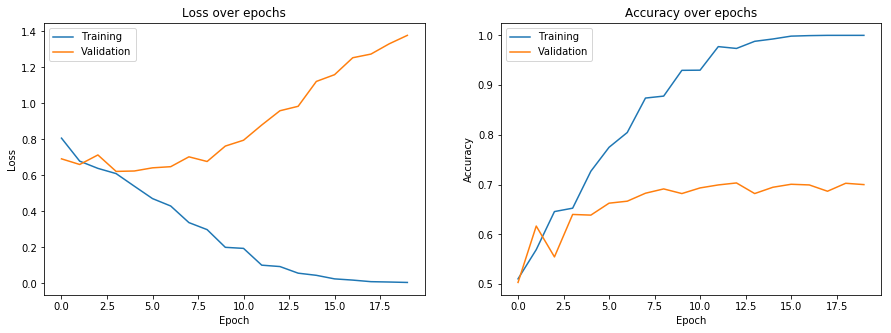

In [11]:
plt.figure(figsize=(15,5))

# Loss
plt.subplot(121)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss over epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper left')

# Accuracy
plt.subplot(122)
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Accuracy over epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper left')

plt.show()

Based on these, what would you suggest for improving your model? Why?

**Your answer:** 
We are able to get extremely good results on the training data but it does not generalize well enough since the validation accuracy stagnates around 65%. This is a problem of overfitting, which is very apparent when looking at the validation loss.

To combat overfitting we can for example add data, regularize or reduce the model complexity. However, in this case our model is already simple, which is probably the reason that it cannot pick up features that are general enough to perform well on the validation set. Therefore, we would likely be better off by increasing the complexity of the model, even though this seems counterintuitive. As a first improvement we will regularize this model.

---
## 3. Improving your initial model

Improve your initial model according to you answer above. Write the new definition in the cell below and train it.

In [36]:
# YOUR CODE HERE
def second_model():
    reg = regularizers.l2(0.005)
    
    # Using base model with just added batch normalization and regularization
    model = Sequential()
    model.add(Conv2D(30, (5, 5), input_shape=(image_width, image_height, 3), 
                 activation='relu', kernel_regularizer=reg))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(32, activation='relu', kernel_regularizer=reg))
    model.add(Dense(1, activation='sigmoid', kernel_regularizer=reg))
    
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

sec_model = second_model()
sec_hist = sec_model.fit_generator(
    train_generator,
    epochs=20,
    validation_data=validation_generator,
    verbose=1,
    shuffle=True,
    steps_per_epoch=60
)

Epoch 1/20
60/60 [==============================] - 9s 156ms/step - loss: 0.8806 - acc: 0.5517 - val_loss: 0.7699 - val_acc: 0.5827
Epoch 2/20
60/60 [==============================] - 8s 128ms/step - loss: 0.7484 - acc: 0.6021 - val_loss: 0.7316 - val_acc: 0.5767
Epoch 3/20
60/60 [==============================] - 7s 125ms/step - loss: 0.7059 - acc: 0.6769 - val_loss: 0.7159 - val_acc: 0.6460
Epoch 4/20
60/60 [==============================] - 8s 126ms/step - loss: 0.7012 - acc: 0.6745 - val_loss: 0.7138 - val_acc: 0.6800
Epoch 5/20
60/60 [==============================] - 8s 126ms/step - loss: 0.6867 - acc: 0.6854 - val_loss: 0.7095 - val_acc: 0.6460
Epoch 6/20
60/60 [==============================] - 8s 131ms/step - loss: 0.6782 - acc: 0.6923 - val_loss: 0.7248 - val_acc: 0.6753
Epoch 7/20
60/60 [==============================] - 8s 126ms/step - loss: 0.6759 - acc: 0.7177 - val_loss: 0.6905 - val_acc: 0.6747
Epoch 8/20
60/60 [==============================] - 8s 127ms/step - loss: 0.

How does the model perform, compared to the initial model? Create one plot with the training accuracy and another with the validation accuracy of the two scenarios.

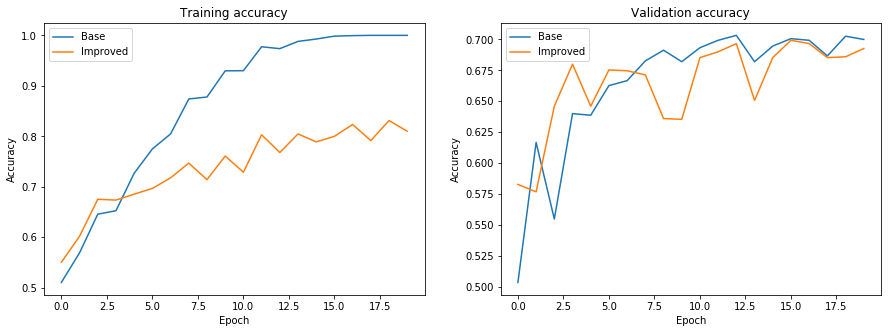

In [37]:
plt.figure(figsize=(15,5))

# Train accuracy
plt.subplot(121)
plt.plot(hist.history['acc'])
plt.plot(sec_hist.history['acc'])
plt.title('Training accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Base', 'Improved'], loc='upper left')

# Val accuracy
plt.subplot(122)
plt.plot(hist.history['val_acc'])
plt.plot(sec_hist.history['val_acc'])
plt.title('Validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Base', 'Improved'], loc='upper left')

plt.show()

Did your results improve? Explain why, or why not.

**Your answer:** The improved model did not improve the validation accuracy. But the regularization did lower the training accuracy to be more similar to the validation. We can also see the debug rows during training that the validation loss does not increase as in our base model. 

Not really an improvment of the accuracy, however, according to the loss we are not overfitting anymore. Instead it seems our model is too simple to generalize for the dataset. 

For further development it would be a good idea to increase the number of convoluational layers to get more abstract features.

---
## 4. Obtaining the *best* model

Continue to improve your model architecture by comparing the value of the metrics you're interested in both the training and validation set. Try different ideas, and consider comparing them using tensorboard. When you're happy with one architecture, copy it in the cell below and train it here. Save the optimization history (i.e. the `history` object returned by the `fit_generator`). You'll use this later to compare your best model with the one using transfer learning.

**Note**: When trying different ideas, you'll end up with several different models. However, when submitting your solutions to ping-pong, the cell below must contain only the definition and training of *one* model. Remove all code related to the models that were not chosen.

In [37]:
# YOUR CODE HERE
def third_model():
    
    l2_sigma = 0.07
    fc_args = { 
        'activation':'relu', 
        'kernel_regularizer':regularizers.l2(l2_sigma)#, 
        #'kernel_initializer':'random_uniform', 
        #'bias_initializer':'random_uniform' 
    }
    args = { **fc_args, 'padding': 'same' }
    #args = { **fc_args }
    
    # Create model
    model = Sequential()
    model.add(Conv2D(16, (3, 3), input_shape=(image_width, image_height, 3), **args))
    model.add(BatchNormalization())
    model.add(Conv2D(16, (3, 3), **args))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    model.add(Conv2D(32, (3, 3), **args))
    model.add(BatchNormalization())
    model.add(Conv2D(32, (3, 3), **args))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3), **args))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3), **args))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    model.add(Flatten())
    model.add(Dense(32, **fc_args))
    model.add(Dropout(0.4))
    model.add(BatchNormalization())
    model.add(Dense(32, **fc_args))
    model.add(Dropout(0.4))
    model.add(BatchNormalization())
    model.add(Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(l2_sigma)))
    
    
    from keras.optimizers import Adam, SGD
    opt = Adam(lr=0.001, decay=0.005)
    #opt = SGD(momentum=0.9, nesterov=True)
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model

#es_cb = keras.callbacks.EarlyStopping(monitor='val_acc', patience=5)
th_model = third_model()
print(th_model.summary())
th_hist = th_model.fit_generator(
    train_generator,
    epochs=30,
    validation_data=validation_generator,
    #steps_per_epoch=80,
    shuffle=True,
    verbose=1,
    #callbacks=[es_cb]
)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_133 (Conv2D)          (None, 100, 100, 16)      448       
_________________________________________________________________
batch_normalization_169 (Bat (None, 100, 100, 16)      64        
_________________________________________________________________
conv2d_134 (Conv2D)          (None, 100, 100, 16)      2320      
_________________________________________________________________
max_pooling2d_67 (MaxPooling (None, 50, 50, 16)        0         
_________________________________________________________________
batch_normalization_170 (Bat (None, 50, 50, 16)        64        
_________________________________________________________________
conv2d_135 (Conv2D)          (None, 50, 50, 32)        4640      
_________________________________________________________________
batch_normalization_171 (Bat (None, 50, 50, 32)        128       
__________

In [40]:
# TODO: Remove cell
th_hist_hist = th_hist.history
with open('best_model_history', 'wb') as file_pi:
    pickle.dump(th_hist_hist, file_pi)

Create one figure with two axes. In one of them, plot the loss in the training and the validation datasets. In the other one, plot the accuracy in the training and validation datasets.

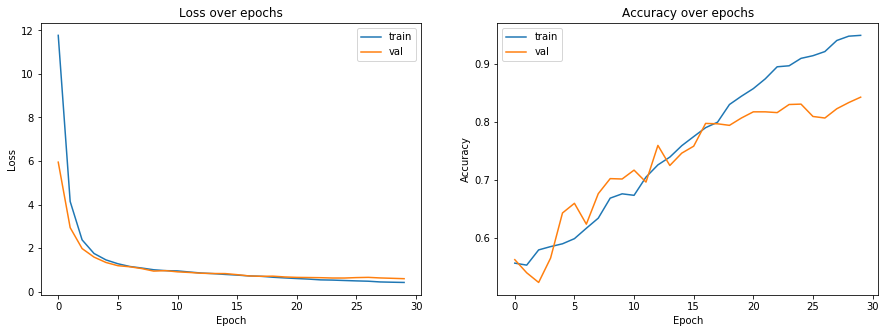

In [38]:
plt.figure(figsize=(15,5))

# Loss
plt.subplot(121)
plt.plot(th_hist.history['loss'])
plt.plot(th_hist.history['val_loss'])
plt.title('Loss over epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper right')

# Accuracy
plt.subplot(122)
plt.plot(th_hist.history['acc'])
plt.plot(th_hist.history['val_acc'])
plt.title('Accuracy over epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')

plt.show()

[Save your model](https://keras.io/getting-started/faq/#how-can-i-save-a-keras-model) to disk as a HDF5 file (the architecture, weights and optimizer state). This is simply so you can use it again easily in the later parts of the notebook, without having to keep it in memory or re-training it. The actual `.h5` files you create are not relevant to your ping-pong submission.

In [39]:
th_model.save('best_model.h5')

---
## 5. Transfer Learning

Now, instead of trying to come up with a good architecture for this task, we'll use the VGG16 architecture, but with the top layers removed (the fully connected + classification layers). We'll substitute them with a single fully connected layer, and a classification layer that makes sense for our problem.

However, this model has a very high capacity, and will probably suffer a lot from overfitting if we try to train it from scratch, using only our small subset of data. Instead, we'll start the optimization with the weights obtained after training VGG16 on the ImageNet dataset.

Start by loading the VGG16 model without the top layers, from the `applications` submodule from Keras. Make sure to also load the weights obtained from the ImageNet pretraining.

In [57]:
# YOUR CODE HERE
from keras.applications.vgg16 import VGG16
vgg_model = VGG16(include_top=False, weights='imagenet', input_shape=(image_width, image_height, 3), pooling='max')

Create a new model with the layers you want to add on top of VGG. The kernels and bias in these layers should be initialized randomly.

In [58]:
# YOUR CODE HERE
model = Sequential()
model.add(Dense(256, activation='relu', kernel_initializer='random_uniform', bias_initializer='random_uniform'))
model.add(Dense(1, activation='sigmoid', kernel_initializer='random_uniform', bias_initializer='random_uniform'))

Now add the new model on top of VGG.

Tip:
- The VGG model you loaded from the `applications` submodule is from the [`Model`](https://keras.io/models/model/) class, not the `Sequential` class, so it doesn't have some methods you're used to (like `add`, for instance). It might be helpful to read [this introduction to the Model class](https://keras.io/getting-started/functional-api-guide/).

In [59]:
# YOUR CODE HERE
from keras.models import Model
trans_model = Model(inputs=vgg_model.input, outputs=model(vgg_model.output))

### 5.1 Using VGG features

Now we're almost ready to train the new model. However, since the top layers of this architecture are being initialized randomly, it's sometimes possible for them to generate large gradients that can wreck the pretraining of the bottom layers. To avoid this, freeze all the VGG layers in your architecture (i.e. signal to the optimizer that these should not be changed during optimization) by setting the `trainable` attribute of them to `False`.

In [60]:
# YOUR CODE HERE
for layer in vgg_model.layers:
    layer.trainable = False

Create the callbacks (if any) you would like to use, compile the model and train it.

In [61]:
# YOUR CODE HERE
tb_callback = keras.callbacks.TensorBoard(log_dir='./Graph', histogram_freq=0, write_graph=True, write_images=True)

trans_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# TODO: Maybe use 256x256 since image-net is based on that resolution
trans_hist = trans_model.fit_generator(
    train_generator,
    epochs=30,
    validation_data=validation_generator,
    callbacks=[tb_callback]
)

with open('trainHistoryDict', 'wb') as file_pi:
    pickle.dump(trans_hist.history, file_pi)

Epoch 1/30
110/110 [==============================] - 24s 220ms/step - loss: 0.4772 - acc: 0.7547 - val_loss: 0.4161 - val_acc: 0.8033
Epoch 2/30
110/110 [==============================] - 21s 191ms/step - loss: 0.3591 - acc: 0.8391 - val_loss: 0.3576 - val_acc: 0.8353
Epoch 3/30
110/110 [==============================] - 24s 215ms/step - loss: 0.3397 - acc: 0.8446 - val_loss: 0.4216 - val_acc: 0.8073
Epoch 4/30
110/110 [==============================] - 24s 220ms/step - loss: 0.3238 - acc: 0.8507 - val_loss: 0.3818 - val_acc: 0.8293
Epoch 5/30
110/110 [==============================] - 24s 214ms/step - loss: 0.3164 - acc: 0.8633 - val_loss: 0.3621 - val_acc: 0.8333
Epoch 6/30
110/110 [==============================] - 20s 185ms/step - loss: 0.2974 - acc: 0.8697 - val_loss: 0.3565 - val_acc: 0.8367
Epoch 7/30
110/110 [==============================] - 24s 219ms/step - loss: 0.2857 - acc: 0.8734 - val_loss: 0.3565 - val_acc: 0.8393
Epoch 8/30
110/110 [==============================] - 2

In [66]:
# TODO: REMOVE CELL
with open('trans_hist', 'wb') as file_pi:
    pickle.dump(trans_hist.history, file_pi)

In [54]:
trans_hist = dict()
with open('trans_hist', 'rb') as file_pi:
    trans_hist['history'] = pickle.load(file_pi)
print(trans_hist)

{'history': {'val_loss': [0.3745703294277191, 0.35828236571947736, 0.37720147395133974, 0.3520467630227407, 0.3685813508828481, 0.35844285027186074, 0.3631246215502421, 0.3655493771235148, 0.3688125697771708, 0.3706889265775681], 'val_acc': [0.8286666668256124, 0.8346666671435038, 0.8233333328564961, 0.839333333492279, 0.8366666668256124, 0.8426666663487752, 0.8366666668256124, 0.8373333338101705, 0.838, 0.8359999995231628], 'loss': [0.4610722586768014, 0.35449089210374013, 0.3243688054425376, 0.3123673162800925, 0.302514810528074, 0.2971729284014021, 0.28436584322793146, 0.2754806027412415, 0.2650818750858307, 0.24792847185475486], 'acc': [0.774571428503309, 0.8345714285714285, 0.8568571428571429, 0.8602857143538338, 0.862, 0.8677142857824053, 0.8734285714966911, 0.8820000000681196, 0.8845714285033089, 0.8911428570747375]}}


Create one figure with two axes. In one of them, plot the loss in the training and the validation datasets. In the other one, plot the accuracy in the training and validation datasets.

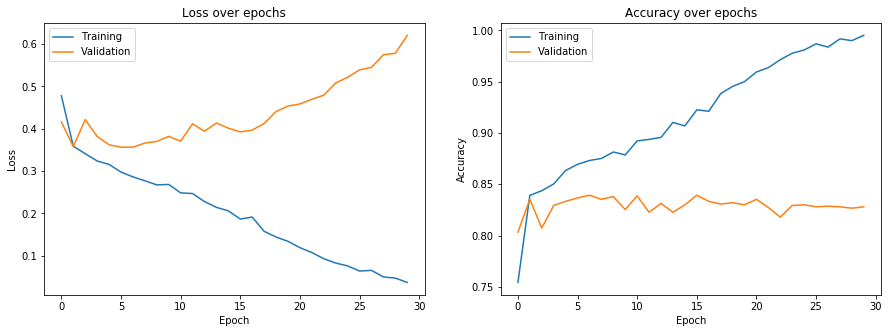

In [63]:
plt.figure(figsize=(15,5))

# Loss
plt.subplot(121)
plt.plot(trans_hist.history['loss'])
plt.plot(trans_hist.history['val_loss'])
plt.title('Loss over epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper left')

# Accuracy
plt.subplot(122)
plt.plot(trans_hist.history['acc'])
plt.plot(trans_hist.history['val_acc'])
plt.title('Accuracy over epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper left')

plt.show()

How does the model perform, compared to the model obtained in step 4? Create one plot with the training accuracy and another with the validation accuracy of the two scenarios.

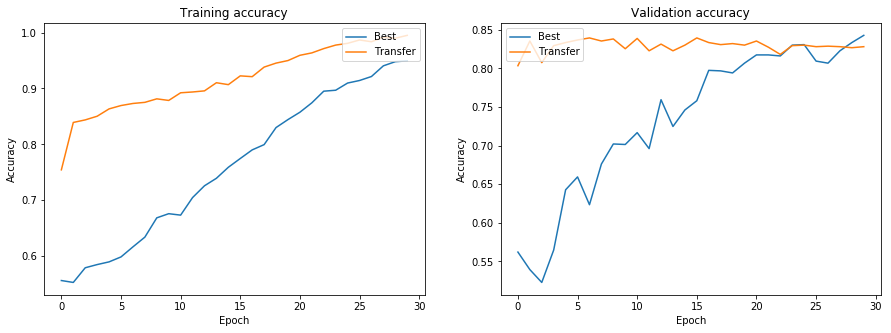

In [65]:
# YOUR CODE HERE

# Train accuracy
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(th_hist.history['acc'])
plt.plot(trans_hist.history['acc'])
plt.title('Training accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Best', 'Transfer'], loc='upper right')

# Val accuracy
plt.subplot(122)
plt.plot(th_hist.history['val_acc'])
plt.plot(trans_hist.history['val_acc'])
plt.title('Validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Best', 'Transfer'], loc='upper left')

plt.show()

Compare these results. Which approach worked best, starting from scratch or doing transfer learning? Explain how you evaluated this.

**Your answer:** In these graphs, we can see without any tuning and with just a single fully connected on top of the transfer model, we get very good results. The best model is slightly better in the end, but as we can see the transfer model just overfits immediatly, so with some more work the transfer learning version will most likely outperform the from scratch version.

What are the main differences between the ImageNet dataset and the Dogs vs Cats dataset we used?

**Your answer:** One obvious difference is that ImageNet contains way more classes. These a classes are also (subjectively) more diverse than cats and dogs. Another really important difference is that ImageNet contains way more data, which makes it possible to use more complex models.

Even though there are considerable differences between these datasets, why is it that transfer learning is still a good idea?

**Your answer:** First of all (as said above) Imagenet contains lots of diverse images, which allows us to use a much more complex model. The reason the transfer makes sense and yields good results right away is that a lot of the images contain cats and dogs and other animals in various environments. The network has therefore learned to extract features that can be used to detect and differentiate these types of images. It is of course still a good idea to retrain the entire network a little bit to fine-tune it this specific dataset.

In which scenario would transfer learning be unsuitable?

**Your answer:** If the data is completely differnet. For example a model trained to classify different kinds of houses would not transfer very well to for example cats. Also it's not enough to make sure that the classes are similar for both networks. The context, environment, etc. can also make transfer learning unsuitable. For example, a network that has been trained to classify animals from perfectly still, clear and zoomed in pictures, might not transfer well to classifying animals in motion captured by a drone flying overhead. 

Save the model to a HDF5 file.

In [67]:
trans_model.save('trans_learning_top_only.h5')

### 5.2 Fine-tuning

Now that we have a better starting point for the top layers, we can train the entire network. Unfreeze the bottom layers.

Tip:
- Always recompile your model after changing anything in it!

In [19]:
fine_trans_model = load_model('trans_learning_top_only.h5')

# YOUR CODE HERE
for layer in fine_trans_model.layers:
    layer.trainable = True

Create the callbacks (if any) you would like to use for this training here, compile the model, and train it.

Tip:
- Even though we do have a decent starting point for the optimization, it's still possible that a bad hyper-parameter choice wrecks the preinitialization. Make sure to use a small learning rate for this step.

In [20]:
# YOUR CODE HERE
from keras.optimizers import Adam
opt = Adam(lr=0.0001)
fine_trans_model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

tb_callback = keras.callbacks.TensorBoard(log_dir='./Graph', histogram_freq=0, write_graph=True, write_images=True)

trans_fine_hist = fine_trans_model.fit_generator(
    train_generator,
    epochs=15,
    validation_data=validation_generator,
    callbacks=[tb_callback]
)

with open('trans_fine_hist', 'wb') as file_pi:
        pickle.dump(trans_fine_hist.history, file_pi)


Epoch 1/15
110/110 [==============================] - 52s 477ms/step - loss: 0.5494 - acc: 0.7250 - val_loss: 0.3539 - val_acc: 0.8493
Epoch 2/15
110/110 [==============================] - 50s 454ms/step - loss: 0.2845 - acc: 0.8726 - val_loss: 0.3757 - val_acc: 0.8413
Epoch 3/15
110/110 [==============================] - 52s 469ms/step - loss: 0.1670 - acc: 0.9321 - val_loss: 0.2981 - val_acc: 0.8807
Epoch 4/15
110/110 [==============================] - 57s 521ms/step - loss: 0.1147 - acc: 0.9520 - val_loss: 0.2626 - val_acc: 0.8947
Epoch 5/15
110/110 [==============================] - 57s 514ms/step - loss: 0.0522 - acc: 0.9824 - val_loss: 0.2732 - val_acc: 0.9247
Epoch 6/15
110/110 [==============================] - 58s 526ms/step - loss: 0.0319 - acc: 0.9903 - val_loss: 0.3130 - val_acc: 0.9127
Epoch 7/15
110/110 [==============================] - 57s 521ms/step - loss: 0.0500 - acc: 0.9807 - val_loss: 0.3387 - val_acc: 0.9107
Epoch 8/15
110/110 [==============================] - 5

How does the model perform, compared to the model trained with freezed layers? Create one plot with the training accuracy and another with the validation accuracy of the two scenarios.

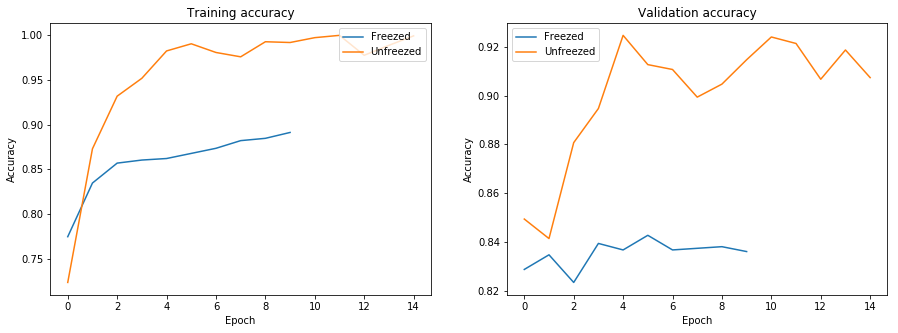

In [21]:
# YOUR CODE HERE

# Train accuracy
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(trans_hist.history['acc'])
plt.plot(trans_fine_hist.history['acc'])
plt.title('Training accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Freezed', 'Unfreezed'], loc='upper right')

# Val accuracy
plt.subplot(122)
plt.plot(trans_hist.history['val_acc'])
plt.plot(trans_fine_hist.history['val_acc'])
plt.title('Validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Freezed', 'Unfreezed'], loc='upper left')

plt.show()

Did the model's performance improve? Why (why not)?

**Your answer:** Yes, it improved significantly on both the training and validation data. However, it seems like the model is overfitting somewhat, considering the very high accuracy on the training data.

Save the model to a HDF5 file.

In [22]:
fine_trans_model.save('trans_learning_full.h5')

### 5.3 Improving the top model (optional)

Improve the architecture for the layers you add on top of VGG16. Try different ideas, and consider comparing them using tensorboard. When you're happy with one architecture, copy it in the cell below and train it here.

In [25]:
#############################################
# New generator with larger image size
image_width = 200
image_height = 200
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size=(image_width, image_height),
        batch_size=64,
        shuffle=True,
        class_mode='binary')
validation_generator = val_datagen.flow_from_directory(
        val_path,
        target_size=(image_width, image_height),
        batch_size=64,
        shuffle=True,
        class_mode='binary')

#############################################
# New top model
reg = regularizers.l2(0.005)
args = { 'kernel_initializer':'random_uniform', 'bias_initializer':'random_uniform', 'kernel_regularizer': reg }
top_model = Sequential()
top_model.add(BatchNormalization())
top_model.add(Dense(1024, activation='relu', **args))
top_model.add(BatchNormalization())
top_model.add(Dropout(0.4))
top_model.add(Dense(1024, activation='relu', **args))
top_model.add(BatchNormalization())
top_model.add(Dropout(0.4))
top_model.add(Dense(1, activation='sigmoid', **args))

vgg_model = keras.applications.vgg16.VGG16(include_top=False, weights='imagenet', input_shape=(image_width, image_height, 3), pooling='max')
model = Model(inputs=vgg_model.input, outputs=top_model(vgg_model.output))

for layer in vgg_model.layers:
    layer.trainable = False
    
es_callback = EarlyStopping(monitor='val_loss', patience=3)

opt = Adam(lr=0.0001, decay=0.01)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
trans_best_hist_locked = model.fit_generator(
    train_generator,
    epochs=50,
    validation_data=validation_generator,
    verbose=1,
    callbacks=[es_callback]
)

for layer in vgg_model.layers:
    layer.trainable = True

opt = Adam(lr=0.00002)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
trans_best_hist_unlocked = model.fit_generator(
    train_generator,
    epochs=50,
    validation_data=validation_generator,
    verbose=1,
    callbacks=[es_callback]
)

with open('hist_trans_best_locked', 'wb') as file_pi:
        pickle.dump(trans_best_hist_locked.history, file_pi)

with open('hist_trans_best_unlocked', 'wb') as file_pi:
        pickle.dump(trans_best_hist_unlocked.history, file_pi)


Found 3500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
Epoch 1/50
55/55 [==============================] - 14s 248ms/step - loss: 6.8261 - acc: 0.7963 - val_loss: 6.5008 - val_acc: 0.8940
Epoch 2/50
55/55 [==============================] - 11s 197ms/step - loss: 6.3675 - acc: 0.8685 - val_loss: 6.1906 - val_acc: 0.9020
Epoch 3/50
55/55 [==============================] - 11s 200ms/step - loss: 6.0678 - acc: 0.8930 - val_loss: 5.9462 - val_acc: 0.9047
Epoch 4/50
55/55 [==============================] - 11s 199ms/step - loss: 5.8262 - acc: 0.9083 - val_loss: 5.7423 - val_acc: 0.9127
Epoch 5/50
55/55 [==============================] - 11s 199ms/step - loss: 5.6293 - acc: 0.9160 - val_loss: 5.5747 - val_acc: 0.9120
Epoch 6/50
55/55 [==============================] - 11s 199ms/step - loss: 5.4546 - acc: 0.9259 - val_loss: 5.4290 - val_acc: 0.9100
Epoch 7/50
55/55 [==============================] - 11s 202ms/step - loss: 5.3204 - acc: 0.9272 - val_loss: 5.3018 - v

How does the model perform, compared to the model trained in step 5.2? Create one plot with the training accuracy and another with the validation accuracy of the two scenarios.

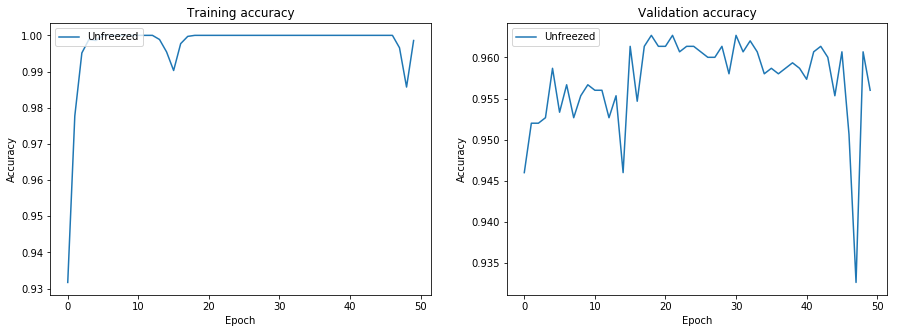

In [ ]:
with open('trans_fine_hist', 'rb') as file_pi:
        trans_fine_hist = pickle.load(file_pi)
        
with open('hist_trans_best_unlocked', 'rb') as file_pi:
        trans_best_hist_unlocked = pickle.load(file_pi)

plt.figure(figsize=(15,5))

# Training accuracy
plt.subplot(121)
plt.plot(trans_fine_hist['acc'])
plt.plot(trans_best_hist_unlocked['acc'])
plt.title('Training accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Unfreezed', 'Fine tuned'], loc='upper left')

# Validation accuracy
plt.subplot(122)
plt.plot(trans_fine_hist['val_acc'])
plt.plot(trans_best_hist_unlocked['val_acc'])
plt.title('Validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Unfreezed', 'Fine tuned'], loc='upper left')

plt.show()

Save the model to a HDF5 file.

In [ ]:
model.save('best_trans_learning.h5')

## 6. Final training

Now we'll train the model that achieved the best performance so far using the entire dataset.

**Note**: start the optimization with the weights you obtained training in the smaller subset, i.e. *not* from scratch.

First, create two new data generators, one for training samples and one for validation samples. This time, they'll load data from the folders for the entire dataset.

In [ ]:

train_big_datagen = ImageDataGenerator(rescale=1./255)

val_big_datagen = ImageDataGenerator(rescale=1./255)

image_width = 200
image_height = 200

train_generator_big = train_big_datagen.flow_from_directory(
        'train',
        target_size=(image_width, image_height),
        batch_size=64,
        class_mode='binary')

validation_generator_big = val_big_datagen.flow_from_directory(
        'val',
        target_size=(image_width, image_height),
        batch_size=64,
        class_mode='binary')

Found 22500 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


Create the callbacks you would like to use and train your model. This optimization might take a long time, so TensorBoard is advised ;).

In [ ]:
model = load_model('best_trans_learning.h5')

opt = Adam(lr=0.00002, decay=0.01)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

hist_final = model.fit_generator(
        train_generator_big,
        epochs=20,
        validation_data=validation_generator_big,
)

with open('hist_final', 'wb') as file_pi:
        pickle.dump(hist_final.history, file_pi)

model.save('best_full.h5')

How does the model perform now when trained on the entire dataset, compared to when only trained on the smaller subset of data? Create one plot with the training accuracy and another with the validation accuracy of the two scenarios.

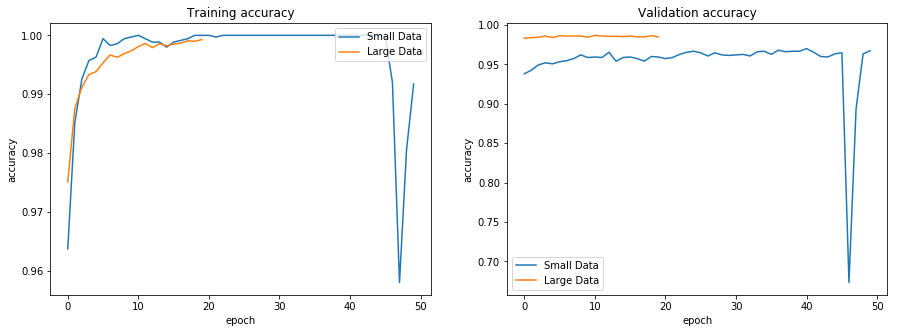

In [ ]:
with open('hist_final', 'rb') as file_pi:
        hist_final = pickle.load(file_pi)

with open('hist_trans_best_unlocked', 'rb') as file_pi:
        trans_best_hist_unlocked = pickle.load(file_pi)

# Train accuracy
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(trans_best_hist_unlocked['acc'])
plt.plot(hist_final['acc'])
plt.title('Training accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Small Data', 'Large Data'], loc='upper right')

# Val accuracy
plt.subplot(122)
plt.plot(trans_best_hist_unlocked['val_acc'])
plt.plot(hist_final['val_acc'])
plt.title('Validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Small Data', 'Large Data'], loc='lower left')

plt.show()

What can you conclude from these plots?

**Your answer:** (fill in here)

## 7. Evaluation on test set

Now we'll evaluate your final model, obtained in step 6, on the test set. As mentioned before, the samples in the test set are not labeled, so we can't compute any performance metrics ourselves. Instead, we'll create a .csv file containing the predictions for each sample, and submit it to Kaggle for evaluation.

Compute the predictions for all samples in the test set according to your best model, and save it in a .csv file with the format expected by the competition.

Tip:
- There is a sample_submission file available for download in the same place where you downloaded the data from. Take a look at it to better understand what is the expected format here.

Hints:
- The Python module `os` has a `listdir` function, which returns the filenames of all files in a given path.
- If you don't know how to create and write to files with Python, Google can help.
- Keras has a submodule called `preprocessing.image`, with some handy functions (for instance `load_img` and `img_to_array`)

In [ ]:
import os
from keras.preprocessing.image import load_img, img_to_array

model = load_model('best_full.h5')

img_width = img_height = 200

img_paths = os.listdir('test')
img_paths.sort(key=lambda x: int(x.strip('.jpg')))

with open('result', 'w') as result_file:
    result_file.write("id,label\n")
    for img_path in img_paths:
        img = load_img('test/%s' % img_path, target_size=(img_width, img_height))
        img_arr = img_to_array(img) / 255
        img_arr = img_arr.reshape(1,img_width,img_height,3)
        
        prediction = model.predict_on_batch(img_arr)
        
        result_file.write("%s,%.10f\n" % (img_path.strip('.jpg'), prediction))



Now that you created your submission file, submit it to Kaggle for evaluation. The [old competition](https://www.kaggle.com/c/dogs-vs-cats) does not allow submissions any more, so submit your file to the [new one](https://www.kaggle.com/c/dogs-vs-cats-redux-kernels-edition). Kaggle evaluates your submission according to your log-loss score. Which score did you obtain?

**Your answer:** (fill in here)

What was the username you used for this submission?

**Your answer:** (fill in here)